<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [ ]:
import numpy as np

def sum_prod(X, V):
    result = np.zeros_like(V[0], dtype=float)
    for i in range(len(X)):
        result += X[i] @ V[i]
    return result

def test_sum_prod():
    X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V = [np.array([[1], [2]]), np.array([[3], [4]])]
    
    result = sum_prod(X, V)
    expected = np.array([[44.], [64.]])
    assert np.allclose(result, expected)
    
    X = [np.eye(2), np.eye(2)]
    V = [np.array([[1], [0]]), np.array([[0], [1]])]
    result = sum_prod(X, V)
    expected = np.array([[1.], [1.]])
    assert np.allclose(result, expected)
    
    print("Все тесты пройдены")

test_sum_prod()

Все тесты пройдены


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [5]:
import numpy as np

def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def test_binarize():
    M = np.array([[0.2, 0.8], [0.6, 0.3]])
    result = binarize(M, 0.5)
    expected = np.array([[0, 1], [1, 0]])
    assert np.array_equal(result, expected)
    
    M = np.array([[1, 2, 3], [0, -1, 5]])
    result = binarize(M, 2)
    expected = np.array([[0, 0, 1], [0, 0, 1]])
    assert np.array_equal(result, expected)
    
    print("Все тесты пройдены")

test_binarize()

Все тесты пройдены


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [6]:
import numpy as np

def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(mat[:, col]) for col in range(mat.shape[1])]

def test_unique():
    mat = np.array([[1, 2, 2], [3, 3, 4], [1, 2, 5]])
    
    row_result = unique_rows(mat)
    expected_rows = [np.array([1, 2]), np.array([3, 4]), np.array([1, 2, 5])]
    for i, expected in enumerate(expected_rows):
        assert np.array_equal(row_result[i], expected)
    
    col_result = unique_columns(mat)
    expected_cols = [np.array([1, 3]), np.array([2, 3]), np.array([2, 4, 5])]
    for i, expected in enumerate(expected_cols):
        assert np.array_equal(col_result[i], expected)
    
    print("Все тесты пройдены")

test_unique()

Все тесты пройдены


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

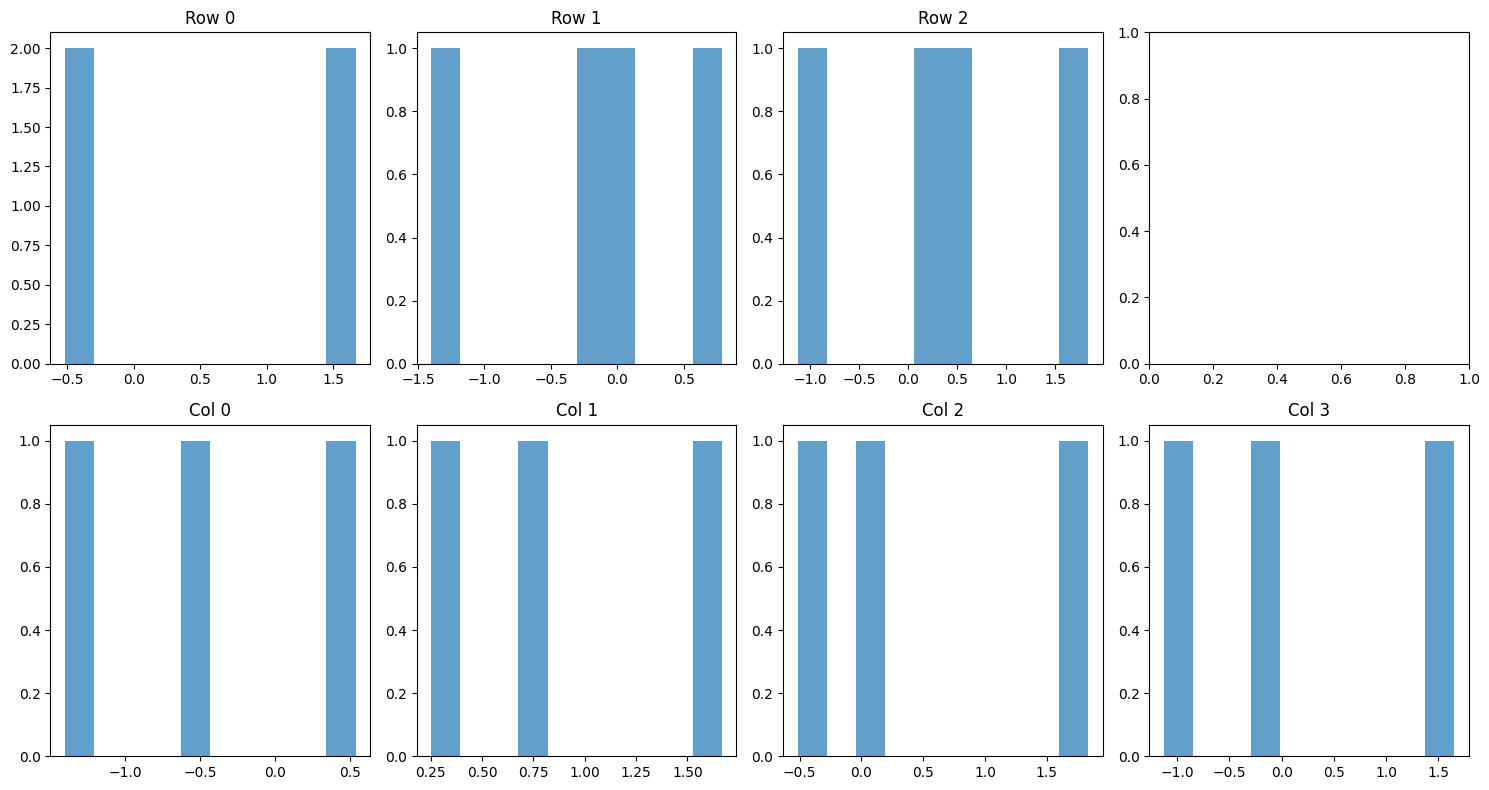

Row means: [ 0.58745773 -0.17239446  0.37510379]
Row vars: [1.15273049 0.61896399 1.10778478]
Col means: [-0.43853188  0.90239918  0.45633487  0.13335392]
Col vars: [0.62635587 0.3404328  1.00474879 1.32248133]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_random_matrix(m, n):
    matrix = np.random.normal(0, 1, (m, n))
    
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    
    fig, axes = plt.subplots(2, max(m, n), figsize=(15, 8))
    
    for i in range(m):
        axes[0, i].hist(matrix[i, :], bins=10, alpha=0.7)
        axes[0, i].set_title(f'Row {i}')
    
    for j in range(n):
        axes[1, j].hist(matrix[:, j], bins=10, alpha=0.7)
        axes[1, j].set_title(f'Col {j}')
    
    plt.tight_layout()
    plt.show()
    
    return matrix, row_means, row_vars, col_means, col_vars

matrix, row_means, row_vars, col_means, col_vars = analyze_random_matrix(3, 4)
print(f"Row means: {row_means}")
print(f"Row vars: {row_vars}")
print(f"Col means: {col_means}")
print(f"Col vars: {col_vars}")

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [8]:
import numpy as np

def chess(m, n, a, b):
    result = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                result[i, j] = a
            else:
                result[i, j] = b
    return result

def test_chess():
    result = chess(3, 3, 1, 0)
    expected = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
    assert np.array_equal(result, expected)
    
    result = chess(2, 4, 5, 7)
    expected = np.array([[5, 7, 5, 7], [7, 5, 7, 5]])
    assert np.array_equal(result, expected)
    
    print("Все тесты пройдены")

test_chess()

Все тесты пройдены


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [9]:
import numpy as np

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    start_x = (m - a) // 2
    start_y = (n - b) // 2
    end_x = start_x + a
    end_y = start_y + b
    
    image[start_x:end_x, start_y:end_y] = rectangle_color
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    center_x, center_y = m // 2, n // 2
    
    for i in range(m):
        for j in range(n):
            if ((i - center_x) ** 2 / a ** 2 + (j - center_y) ** 2 / b ** 2) <= 1:
                image[i, j] = ellipse_color
    
    return image

def test_shapes():
    rect = draw_rectangle(50, 30, 100, 100, [255, 0, 0], [0, 255, 0])
    assert rect.shape == (100, 100, 3)
    assert np.array_equal(rect[25, 35], [255, 0, 0])
    assert np.array_equal(rect[0, 0], [0, 255, 0])
    
    ellipse = draw_ellipse(20, 15, 100, 100, [0, 0, 255], [255, 255, 255])
    assert ellipse.shape == (100, 100, 3)
    assert np.array_equal(ellipse[50, 50], [0, 0, 255])
    
    print("Все тесты пройдены")

test_shapes()

Все тесты пройдены


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [10]:
import numpy as np

def analyze_time_series(series, window_size):
    mean = np.mean(series)
    variance = np.var(series)
    std = np.std(series)
    
    local_maxima = []
    local_minima = []
    
    for i in range(1, len(series) - 1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            local_maxima.append(i)
        elif series[i] < series[i-1] and series[i] < series[i+1]:
            local_minima.append(i)
    
    moving_average = []
    for i in range(len(series) - window_size + 1):
        window = series[i:i + window_size]
        moving_average.append(np.mean(window))
    
    return {
        'mean': mean,
        'variance': variance,
        'std': std,
        'local_maxima': local_maxima,
        'local_minima': local_minima,
        'moving_average': np.array(moving_average)
    }

series = np.array([1, 3, 2, 5, 4, 7, 6, 8, 9, 7, 5, 3, 1])
result = analyze_time_series(series, 3)

print(f"Mean: {result['mean']:.2f}")
print(f"Variance: {result['variance']:.2f}")
print(f"Std: {result['std']:.2f}")
print(f"Local maxima at indices: {result['local_maxima']}")
print(f"Local minima at indices: {result['local_minima']}")
print(f"Moving average: {result['moving_average']}")

Mean: 4.69
Variance: 6.37
Std: 2.52
Local maxima at indices: [1, 3, 5, 8]
Local minima at indices: [2, 4, 6]
Moving average: [2.         3.33333333 3.66666667 5.33333333 5.66666667 7.
 7.66666667 8.         7.         5.         3.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [11]:
import numpy as np

def one_hot_encoding(labels):
    num_classes = np.max(labels) + 1
    one_hot = np.zeros((len(labels), num_classes), dtype=int)
    
    for i, label in enumerate(labels):
        one_hot[i, label] = 1
    
    return one_hot

def test_one_hot():
    labels = np.array([0, 2, 3, 0])
    result = one_hot_encoding(labels)
    expected = np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]])
    assert np.array_equal(result, expected)
    
    labels = np.array([1, 0, 1])
    result = one_hot_encoding(labels)
    expected = np.array([[0, 1], [1, 0], [0, 1]])
    assert np.array_equal(result, expected)
    
    print("Все тесты пройдены")

test_one_hot()

labels = np.array([0, 2, 3, 0])
one_hot = one_hot_encoding(labels)
print(f"Original: {labels}")
print(f"One-hot:\n{one_hot}")

Все тесты пройдены
Original: [0 2 3 0]
One-hot:
[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
